In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
#db connect

import sqlite3
from sqlite3 import Error
 
 
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None
 
 
def select_all_tasks(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM dataset")
    #cur.execute("SHOW tables") 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)
 
 
def select_task_by_priority(conn, priority):
    """
    Query tasks by priority
    :param conn: the Connection object
    :param priority:
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM tasks WHERE priority=?", (priority,))
 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)
 
 
def main():
    database = "finaldb"
 
    # create a database connection
    conn = create_connection(database)
    with conn:
       # print("1. Query task by priority:")
       # select_task_by_priority(conn,1)
 
        print("2. Query all tasks")
        select_all_tasks(conn)
 
 
if __name__ == '__main__':
    main()


2. Query all tasks
('1', '153080620724_10159864609515725', 'We will fight TOGETHER, sacrifice TOGETHER, and stand TOGETHER for peace, for freedom, for justice, for family, for humanity, and for the almighty God who made us all.', '167', 'photo', '9/19/2017', '17-Sep', 'Tuesday', 'Evening', 'After', '72554', '15605', '553', '183', '24', '103', '0', '89022', '5404', '12517', '81.5', '17.53', '0.62', '0.21', '0.03', '0.12', '0', '7', '2', 'positive')
('2', '153080620724_10159863974900725', 'God bless the people of Mexico City. We are with you and will be there for you.', '79', 'photo', '9/19/2017', '17-Sep', 'Tuesday', 'Evening', 'After', '56294', '5526', '536', '222', '2284', '167', '0', '65029', '4408', '5803', '86.57', '8.5', '0.82', '0.34', '3.51', '0.26', '0', '7', '1', 'positive')
('3', '153080620724_10159863736415725', 'As President of the United States of America, I will ALWAYS put #AmericaFirst.ðŸ‡ºðŸ‡¸', '86', 'video', '9/19/2017', '17-Sep', 'Tuesday', 'Evening', 'After', '23628

('990', '153080620724_10157824898460725', 'Law enforcement is a force for GOOD! They bring communities together and keep us safe. We must respect and stand by them!', '121', 'video', '10/4/2016', '16-Oct', 'Tuesday', 'Evening', 'Before', '51387', '3842', '64', '48', '6', '80', '0', '55427', '2494', '6892', '92.71', '6.93', '0.12', '0.09', '0.01', '0.14', '0', '13', '3', 'positive')
('991', '153080620724_10157824807065725', 'This is the perfect match--a match made in CORRUPTION!', '54', 'video', '10/4/2016', '16-Oct', 'Tuesday', 'Evening', 'Before', '21619', '756', '1108', '125', '35', '217', '0', '23860', '1252', '5504', '90.61', '3.17', '4.64', '0.52', '0.15', '0.91', '0', '13', '0', 'neutral')
('992', '153080620724_10157824532170725', 'Tonightâ€™s debate will be a stark contrast between our campaign of BIG ideas and BOLD solutions for tomorrow, versus Clinton-Kaineâ€™s ESTABLISHMENT PAST! #VPDebate #BigLeagueTruth', '181', 'photo', '10/4/2016', '16-Oct', 'Tuesday', 'Evening', 'Before

In [2]:
#DonaldTrump_FB Analytics

dataset = pd.read_csv("dataset.csv") #load the dataset
dataset.head(2)

,row_id,status_id,status_message,status_length,status_type,status_date,status_day,status_time,election_status,num_likes,...,perc_likes,perc_love,perc_hahas,perc_wows,perc_sads,perc_angrys,perc_special,freq,score,status_sentiment
0,1,153080620724_10159864609515725,"We will fight TOGETHER, sacrifice TOGETHER, an...",167,photo,9/19/2017,Tuesday,Evening,After,72554,...,81.50,17.53,0.62,0.21,0.03,0.12,0.0,7,2,positive
1,2,153080620724_10159863974900725,God bless the people of Mexico City. We are wi...,79,photo,9/19/2017,Tuesday,Evening,After,56294,...,86.57,8.50,0.82,0.34,3.51,0.26,0.0,7,1,positive


In [38]:
#check the decoration
dataset.columns

Index(['row_id', 'status_id', 'status_message', 'status_length', 'status_type',
       'status_date', 'status_day', 'status_time', 'election_status',
       'num_likes', 'num_loves', 'num_hahas', 'num_wows', 'num_sads',
       'num_angrys', 'num_special', 'num_reactions', 'num_comments',
       'num_shares', 'perc_likes', 'perc_love', 'perc_hahas', 'perc_wows',
       'perc_sads', 'perc_angrys', 'perc_special', 'freq', 'score',
       'status_sentiment'],
      dtype='object')

In [3]:
dataset.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 29 columns):
row_id              1179 non-null int64
status_id           1179 non-null object
status_message      1158 non-null object
status_length       1179 non-null int64
status_type         1179 non-null object
status_date         1179 non-null object
status_day          1179 non-null object
status_time         1179 non-null object
election_status     1179 non-null object
num_likes           1179 non-null int64
num_loves           1179 non-null int64
num_hahas           1179 non-null int64
num_wows            1179 non-null int64
num_sads            1179 non-null int64
num_angrys          1179 non-null int64
num_special         1179 non-null int64
num_reactions       1179 non-null int64
num_comments        1179 non-null int64
num_shares          1179 non-null int64
perc_likes          1179 non-null float64
perc_love           1179 non-null float64
perc_hahas          1179 non-null float64


In [4]:
#checking the data
dataset.isnull().sum()

row_id               0
status_id            0
status_message      21
status_length        0
status_type          0
status_date          0
status_day           0
status_time          0
election_status      0
num_likes            0
num_loves            0
num_hahas            0
num_wows             0
num_sads             0
num_angrys           0
num_special          0
num_reactions        0
num_comments         0
num_shares           0
perc_likes           0
perc_love            0
perc_hahas           0
perc_wows            0
perc_sads            0
perc_angrys          0
perc_special         0
freq                 0
score                0
status_sentiment     0
dtype: int64

In [88]:
dataset.drop('row_id',axis=1,inplace=True) 
dataset.drop('status_id',axis=1,inplace=True) 
dataset.drop('status_message',axis=1,inplace=True)
dataset.drop('status_date',axis=1,inplace=True)
#dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [42]:
dataset.head(3)

,status_length,status_type,status_day,status_time,election_status,num_likes,num_loves,num_hahas,num_wows,num_sads,...,perc_likes,perc_love,perc_hahas,perc_wows,perc_sads,perc_angrys,perc_special,freq,score,status_sentiment
0,167,photo,Tuesday,Evening,After,72554,15605,553,183,24,...,81.50,17.53,0.62,0.21,0.03,0.12,0.0,7,2,positive
1,79,photo,Tuesday,Evening,After,56294,5526,536,222,2284,...,86.57,8.50,0.82,0.34,3.51,0.26,0.0,7,1,positive
2,86,video,Tuesday,Evening,After,236284,45142,1738,430,83,...,83.18,15.89,0.61,0.15,0.03,0.13,0.0,7,0,neutral


In [5]:
# Read the dataset
df = pd.read_csv('trumpdataset.csv').set_index('status_date')
df.index = pd.to_datetime(df.index)
df.head()

,row_id,status_id,status_message,status_length,status_type,status_date.1,status_day,status_time,election_status,num_likes,...,perc_likes,perc_love,perc_hahas,perc_wows,perc_sads,perc_angrys,perc_special,freq,score,status_sentiment
status_date,,,,,,,,,,,,,,,,,,,,,
2017-09-19,1,153080620724_10159864609515725,"We will fight TOGETHER, sacrifice TOGETHER, an...",167,photo,Sep-17,Tuesday,Evening,After,72554,...,81.50,17.53,0.62,0.21,0.03,0.12,0.0,7,2,positive
2017-09-19,2,153080620724_10159863974900725,God bless the people of Mexico City. We are wi...,79,photo,Sep-17,Tuesday,Evening,After,56294,...,86.57,8.50,0.82,0.34,3.51,0.26,0.0,7,1,positive
2017-09-19,3,153080620724_10159863736415725,"As President of the United States of America, ...",86,video,Sep-17,Tuesday,Evening,After,236284,...,83.18,15.89,0.61,0.15,0.03,0.13,0.0,7,0,neutral
2017-09-19,4,153080620724_10159862378505725,NaN,0,video,Sep-17,Tuesday,Morning,After,58050,...,80.55,18.11,0.35,0.66,0.07,0.27,0.0,7,0,neutral
2017-09-19,5,153080620724_10159862044760725,Big day at the United Nations - many good thin...,129,photo,Sep-17,Tuesday,Morning,After,23745,...,87.20,11.21,1.07,0.25,0.08,0.20,0.0,7,1,positive


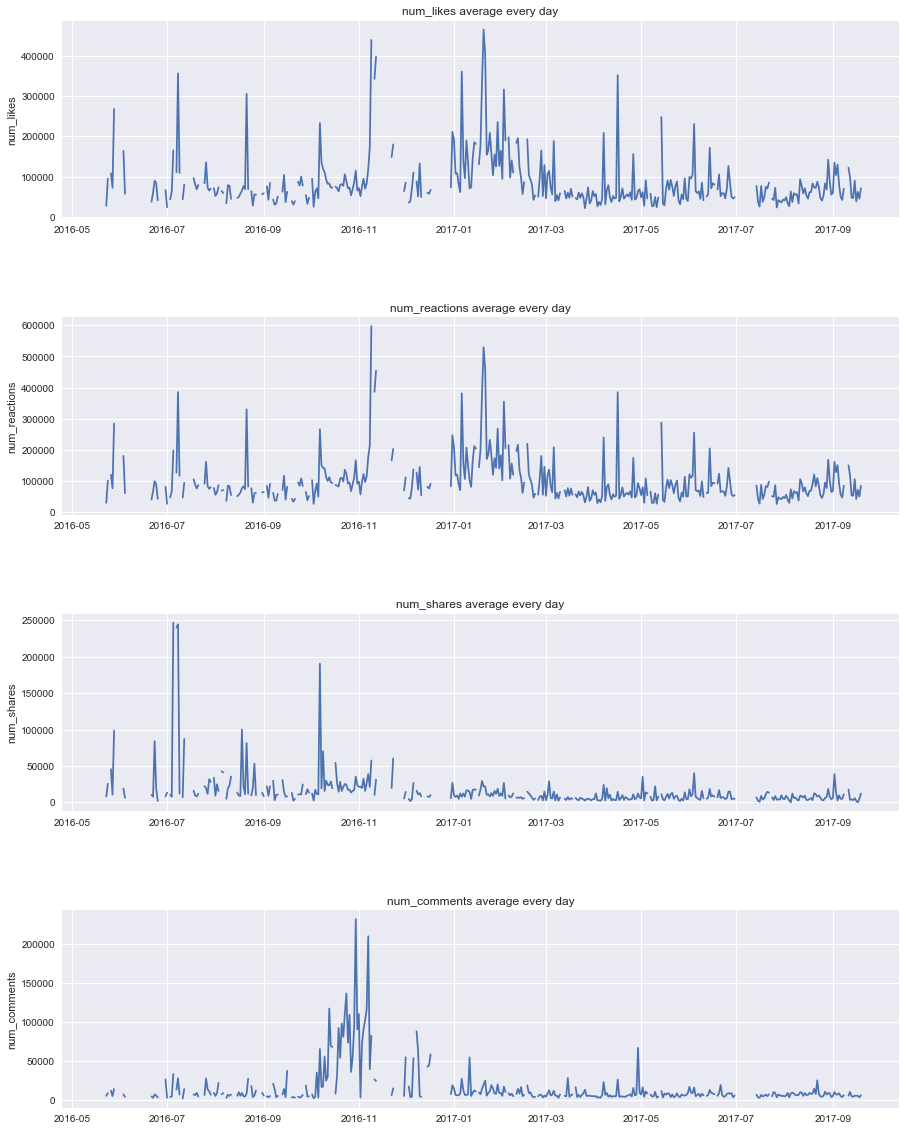

In [6]:
plt.close()

#Time Series Analysis
fig = plt.figure()
fig.set_size_inches(15,20, forward=True)
fig.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(411)
ax1.plot(df['num_likes'].resample("D").apply([np.mean])) #.plot()
ax1.set_title("num_likes average every day")
ax1.set_ylabel("num_likes")

ax2 = fig.add_subplot(412)
ax2.plot(df['num_reactions'].resample("D").apply([np.mean]))#.plot()
ax2.set_title("num_reactions average every day")
ax2.set_ylabel("num_reactions")

ax3 = fig.add_subplot(413)
ax3.plot(df['num_shares'].resample("D").apply([np.mean])) #.plot()
ax3.set_title("num_shares average every day")
ax3.set_ylabel("num_shares")

ax4 = fig.add_subplot(414)
ax4.plot(df['num_comments'].resample("D").apply([np.mean]))#.plot()
ax4.set_title("num_comments average every day")
ax4.set_ylabel("num_comments")

plt.show()

In [8]:
#DonaldTrump_SentimentAnalysis

data = pd.read_csv("trumpdataset_my_sent.csv") #load the dataset
data.head(2)

,month_year,status_sentiment,N
0,16-Aug,negative,13
1,16-Aug,neutral,6


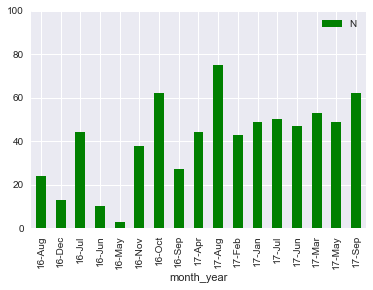

In [9]:
pos = data[data['status_sentiment'] == 'positive']
pos.plot.bar(x = 'month_year',y = 'N',color='green')
plt.ylim(0,100)
plt.show()

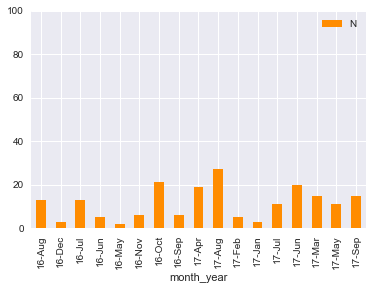

In [10]:
plt.close()
neg = data[data['status_sentiment'] == 'negative']
neg.plot.bar(x = 'month_year',y = 'N',color='darkorange') #'br' --2 colors appear alternatively
plt.ylim(0,100)
plt.show()

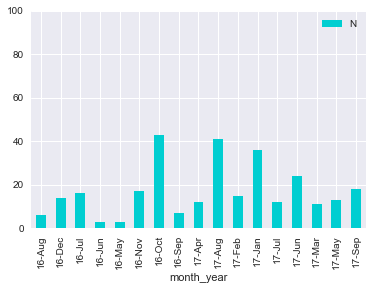

In [11]:
plt.close()
neutral = data[data['status_sentiment'] == 'neutral']
neutral.plot.bar(x = 'month_year',y = 'N',color= 'darkturquoise') # # 'grey' 'aquamarine' gold
plt.ylim(0,100)
plt.show()

In [12]:
#DonaldTrump_SentimentAnalysis

dt = pd.read_csv("trumpdataset.csv") #load the dataset

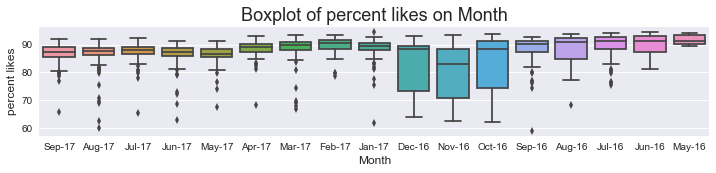

In [13]:
plt.close() #How likeable his posts are?!
plt.figure(figsize=(12,2))
sns.boxplot(x = 'status_date.1', y = 'perc_likes', data = dt)
plt.ylabel('percent likes', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of percent likes on Month', fontsize = 18)
plt.show()

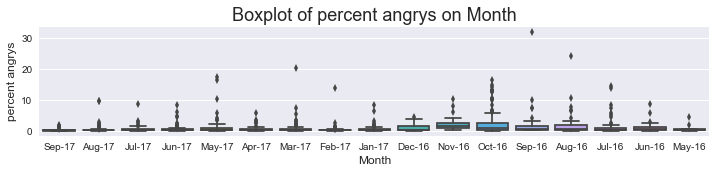

In [15]:
plt.close() #How likeable his posts are?!
plt.figure(figsize=(12,2))
sns.boxplot(x = 'status_date.1', y = 'perc_angrys', data = dt)
plt.ylabel('percent angrys', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of percent angrys on Month', fontsize = 18)
plt.show()

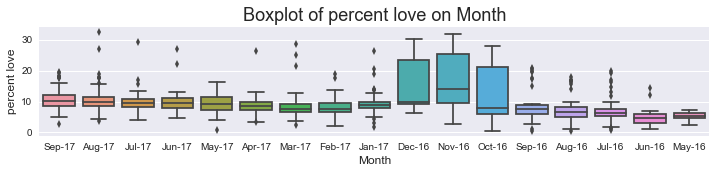

In [16]:
plt.close() #How likeable his posts are?!
plt.figure(figsize=(12,2))
sns.boxplot(x = 'status_date.1', y = 'perc_love', data = dt)
plt.ylabel('percent love', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of percent love on Month', fontsize = 18)
plt.show()

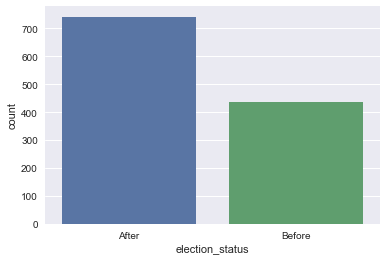

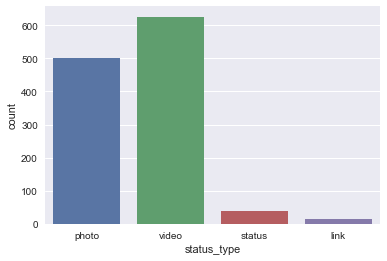

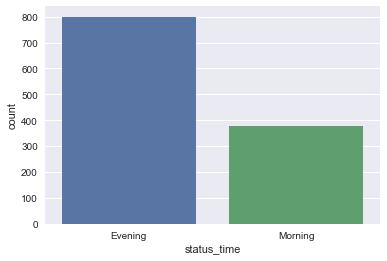

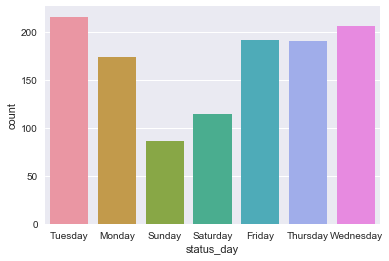

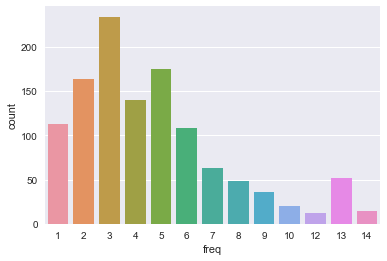

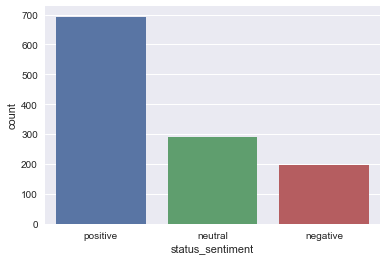

In [17]:
sns.countplot(x='election_status',data=dataset)
plt.show()

plt.close()
sns.countplot(x='status_type',data=dataset)
plt.show()

plt.close()
sns.countplot(x='status_time',data=dataset)
plt.show()

plt.close()
sns.countplot(x='status_day',data=dataset)
plt.show()

plt.close()
sns.countplot(x='freq',data=dataset)
plt.show()

plt.close()
sns.countplot(x='status_sentiment',data=dataset)
plt.show()

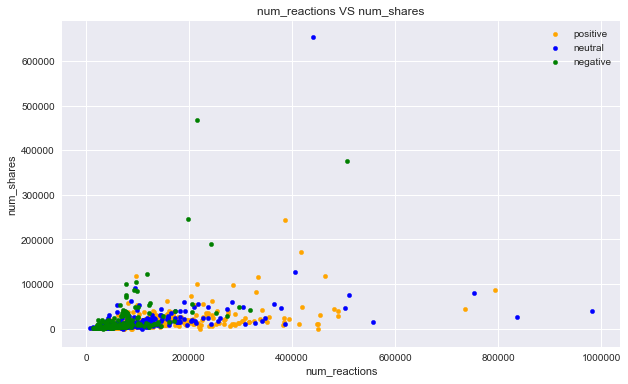

In [18]:
plt.close()
fig = dataset[dataset.status_sentiment=='positive'].plot(kind='scatter',x='num_reactions',y='num_shares',color='orange', label='positive')
dataset[dataset.status_sentiment=='neutral'].plot(kind='scatter',x='num_reactions',y='num_shares',color='blue', label='neutral',ax=fig)
dataset[dataset.status_sentiment=='negative'].plot(kind='scatter',x='num_reactions',y='num_shares',color='green', label='negative', ax=fig)
fig.set_xlabel("num_reactions")
fig.set_ylabel("num_shares")
fig.set_title("num_reactions VS num_shares")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

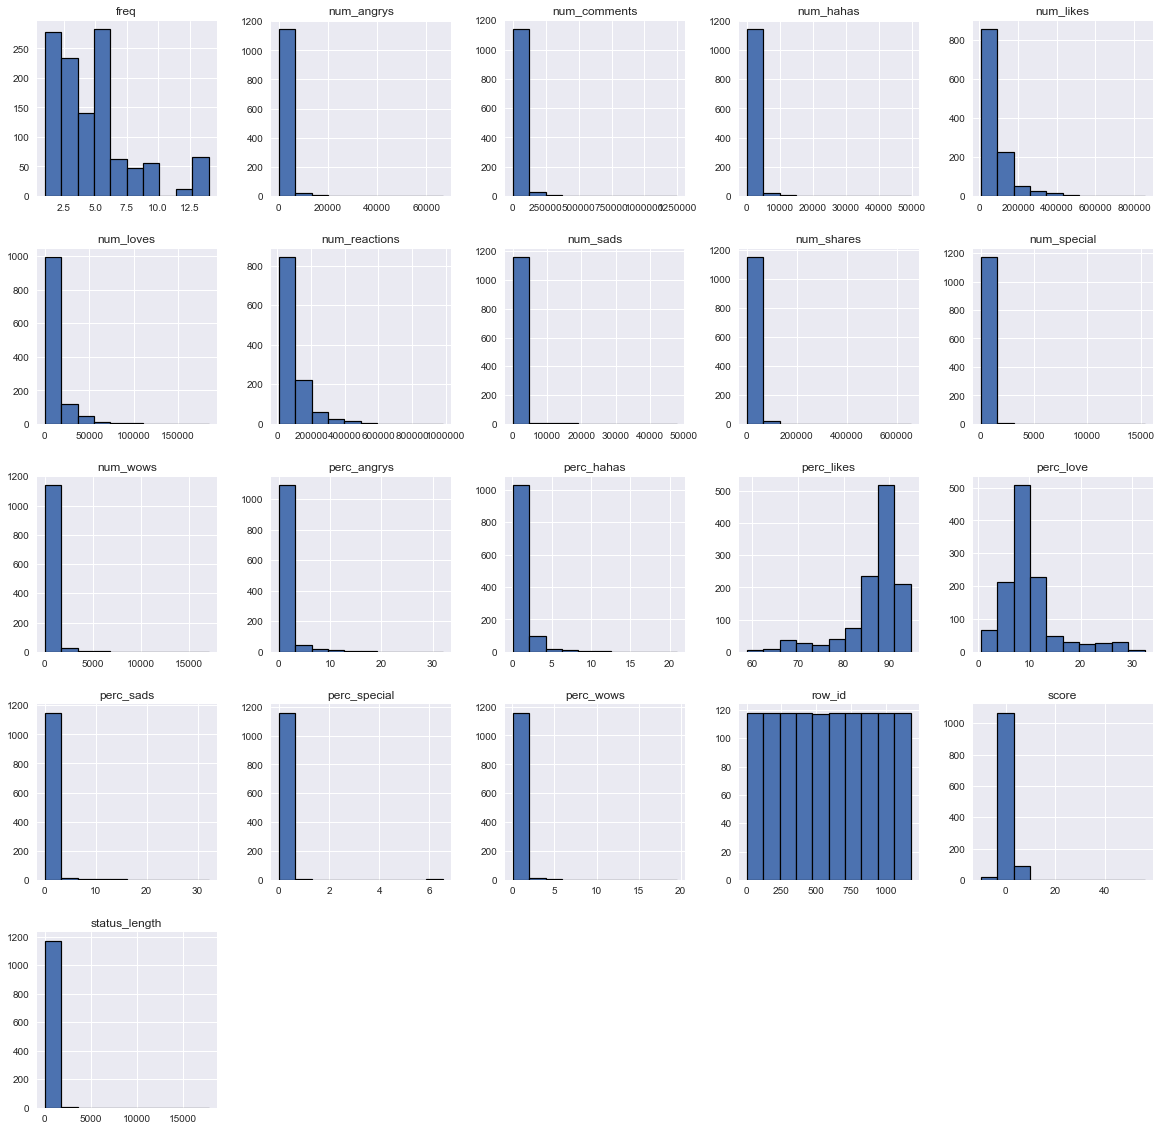

In [19]:
plt.close()
dataset.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

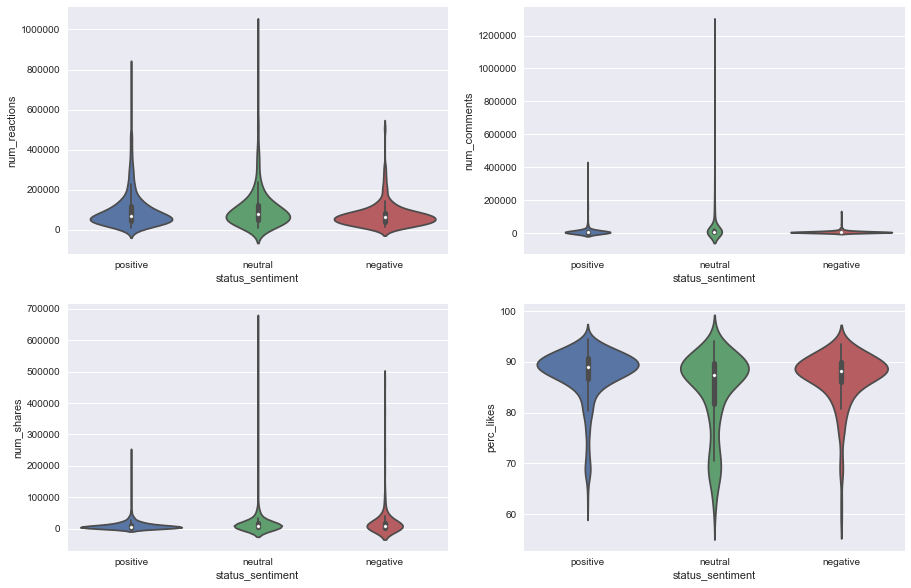

In [20]:
plt.close()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='status_sentiment',y='num_reactions',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='status_sentiment',y='num_comments',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='status_sentiment',y='num_shares',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='status_sentiment',y='perc_likes',data=dataset)
plt.show()

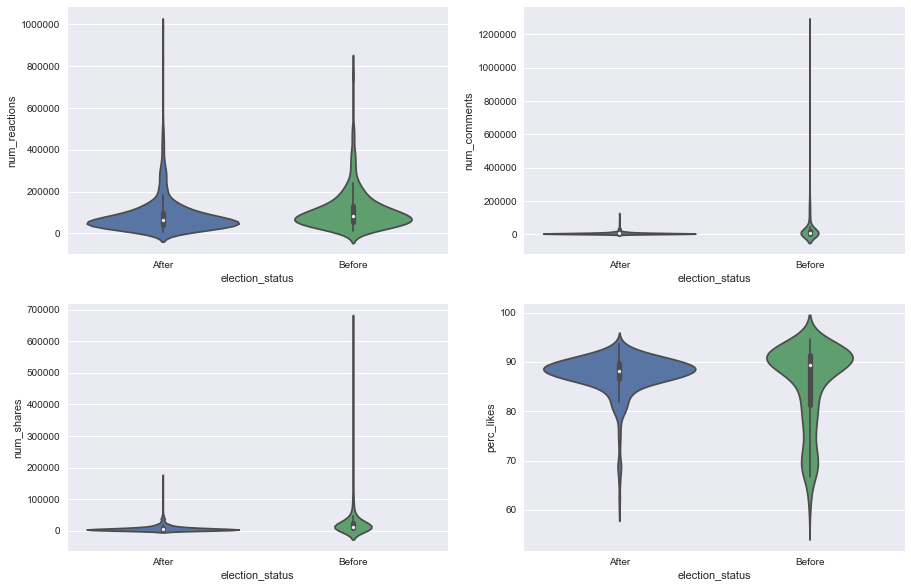

In [21]:
plt.close()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='election_status',y='num_reactions',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='election_status',y='num_comments',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='election_status',y='num_shares',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='election_status',y='perc_likes',data=dataset)
plt.show()

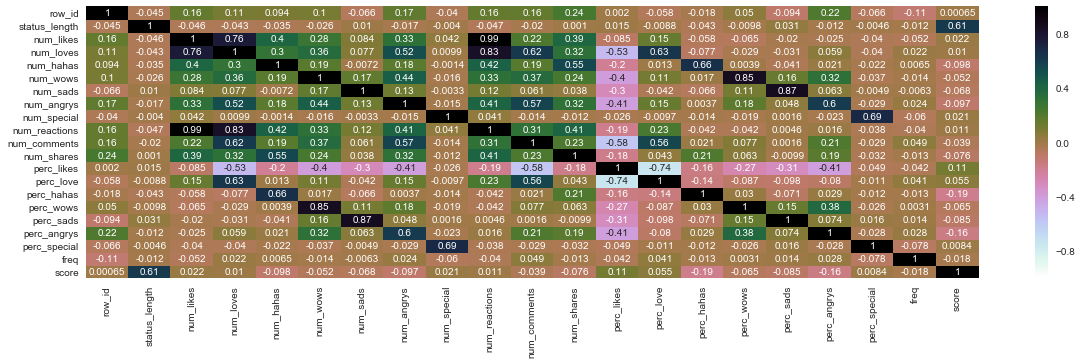

In [22]:
plt.close()
plt.figure(figsize=(20,5)) 
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(dataset.corr())
plt.show()

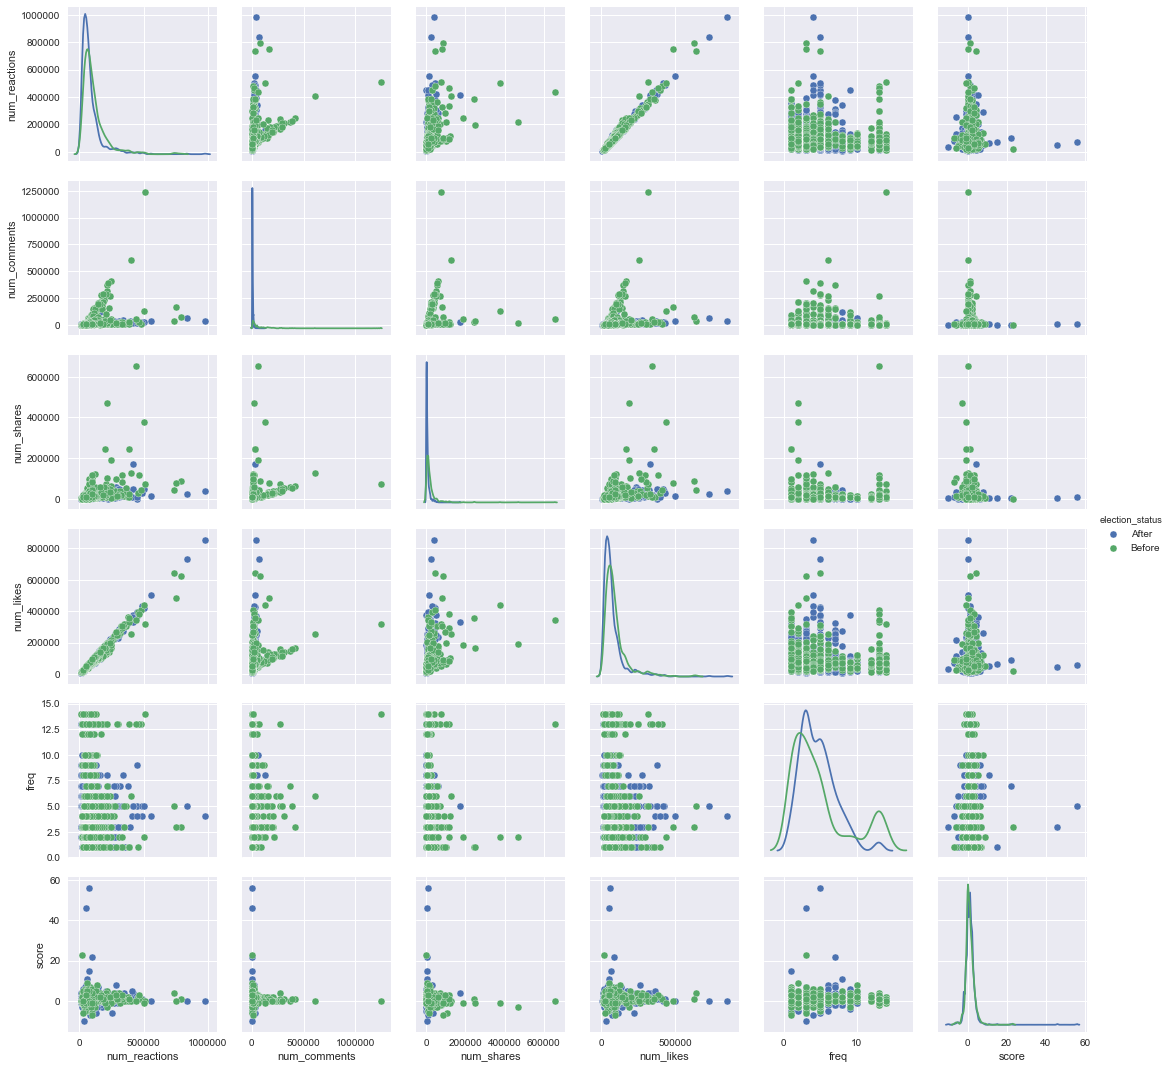

In [43]:
election_subset = dataset[['election_status','num_reactions','num_comments','num_shares','num_likes','freq','score']]
#print(election_subset.shape)
plt.close()
sns.pairplot(data=election_subset,hue='election_status',diag_kind='kde')
plt.show()

In [5]:
#descriptive statistics summary
dataset['num_likes'].describe()

count      1179.000000
mean      83185.457167
std       79442.812856
min        7267.000000
25%       37640.000000
50%       61026.000000
75%       97606.000000
max      854196.000000
Name: num_likes, dtype: float64

In [89]:
dataset['election_status'] = dataset['election_status'].astype('category')
dataset['election_status'] = dataset['election_status'].cat.reorder_categories(['Before', 'After'], ordered=True)
dataset['election_status'] = dataset['election_status'].cat.codes

In [91]:
dataset['status_sentiment'] = dataset['status_sentiment'].astype('category')
dataset['status_sentiment'] = dataset['status_sentiment'].cat.reorder_categories(['negative', 'neutral', 'positive'], ordered=True)
dataset['status_sentiment'] = dataset['status_sentiment'].cat.codes

dataset['status_time'] = dataset['status_time'].astype('category')
dataset['status_time'] = dataset['status_time'].cat.codes

dataset['status_type'] = dataset['status_type'].astype('category')
dataset['status_type'] = dataset['status_type'].cat.codes

dataset['status_day'] = dataset['status_day'].astype('category')
dataset['status_day'] = dataset['status_day'].cat.codes
#print(dataset['status_day'])

In [18]:
dataset.head(3)

,status_length,status_type,status_day,status_time,election_status,num_likes,num_loves,num_hahas,num_wows,num_sads,...,perc_likes,perc_love,perc_hahas,perc_wows,perc_sads,perc_angrys,perc_special,freq,score,status_sentiment
0,167,1,5,0,1,11.192086,15605,553,183,24,...,81.50,17.53,0.62,0.21,0.03,0.12,0.0,7,2,2
1,79,1,5,0,1,10.938343,5526,536,222,2284,...,86.57,8.50,0.82,0.34,3.51,0.26,0.0,7,1,2
2,86,3,5,0,1,12.372790,45142,1738,430,83,...,83.18,15.89,0.61,0.15,0.03,0.13,0.0,7,0,1


In [19]:
from sklearn import linear_model

In [58]:
dataset["freq"] = dataset["freq"]-1 #other status posts

In [20]:
X = dataset[["num_reactions","num_comments","status_type","election_status","status_length","freq","score","status_sentiment"]]

y = dataset[["num_shares"]] ##Data before and after log transformation

In [21]:
X.head(2)

,num_reactions,num_comments,status_type,election_status,status_length,freq,score,status_sentiment
0,11.396639,8.594895,1,1,167,7,2,2
1,11.082589,8.391176,1,1,79,7,1,2


In [22]:
y.head(2)

,num_shares
0,9.434843
1,8.666130


In [48]:
#Before Transformation

## X usually means our input variables (or independent variables)

X = dataset[["num_reactions","num_comments","status_type","election_status","status_length","freq","score","status_sentiment"]]
#y = dataset[["num_likes"]]

## Y usually means our output/dependent variable
y = dataset[["num_shares"]] ##Data before and after log transformation

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_shares   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     49.55
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.09e-69
Time:                        00:38:17   Log-Likelihood:                -13728.
No. Observations:                1179   AIC:                         2.747e+04
Df Residuals:                    1170   BIC:                         2.752e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3835.2793   3381.956      1.134      0.257   -2800.096    1.05e+04
num_reactions        0.1349      0.009     14.718      0.000       0.117       0.153
num_comments         0.0223      0.016      1.422      0.155      -0.008       0.053
status_type       4763.9335    856.442      5.562      0.000    3083.599    6444.268
election_status  -9846.6852   1781.019     -5.529      0.000   -1.33e+04   -6352.337
status_length        2.6855      1.832      1.466      0.143      -0.909       6.280
freq              -154.0509    263.008     -0.586      0.558    -670.071     361.969
score             -497.8058    464.609     -1.071      0.284   -1409.366     413.755
status_sentiment -4644.8306   1451.309     -3.200      0.001   -7492.289   -1797.372
==============================================================================
Omnibus:                     2152.313   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2541252.303
Skew:                          12.694   Prob(JB):                         0.00
Kurtosis:                     229.022   Cond. No.                     6.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Before Transformation

## X usually means our input variables (or independent variables)

X = dataset[["num_comments","num_shares","status_type","election_status","status_length","freq","score","status_sentiment"]]
#y = dataset[["num_likes"]]

## Y usually means our output/dependent variable
y = dataset[["num_reactions"]] ##Data before and after log transformation



X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_reactions   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     51.91
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.13e-72
Time:                        00:38:43   Log-Likelihood:                -14995.
No. Observations:                1179   AIC:                         3.001e+04
Df Residuals:                    1170   BIC:                         3.005e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.494e+04   9517.900      9.975      0.000    7.63e+04    1.14e+05
num_comments         0.4233      0.044      9.540      0.000       0.336       0.510
num_shares           1.1580      0.079     14.718      0.000       1.004       1.312
status_type      -1.494e+04   2504.497     -5.965      0.000   -1.99e+04      -1e+04
election_status  -3419.4271   5285.066     -0.647      0.518   -1.38e+04    6949.838
status_length       -8.3707      5.367     -1.560      0.119     -18.902       2.160
freq             -1154.1836    769.973     -1.499      0.134   -2664.866     356.499
score              834.5922   1361.729      0.613      0.540   -1837.111    3506.295
status_sentiment  1.291e+04   4254.117      3.035      0.002    4563.337    2.13e+04
==============================================================================
Omnibus:                      943.213   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29025.748
Skew:                           3.459   Prob(JB):                         0.00
Kurtosis:                      26.302   Cond. No.                     2.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Before Transformation

## X usually means our input variables (or independent variables)

X = dataset[["num_reactions","num_shares","status_type","election_status","status_length","freq","score","status_sentiment"]]
#y = dataset[["num_likes"]]

## Y usually means our output/dependent variable
y = dataset[["num_comments"]] ##Data before and after log transformation



X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_comments   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     138.3
Date:                Thu, 14 Dec 2017   Prob (F-statistic):          2.88e-163
Time:                        00:49:42   Log-Likelihood:                -1320.7
No. Observations:                1179   AIC:                             2659.
Df Residuals:                    1170   BIC:                             2705.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8060      0.359     -2.246      0.025      -1.510      -0.102
num_reactions        0.8171      0.041     19.797      0.000       0.736       0.898
num_shares           0.0512      0.028      1.862      0.063      -0.003       0.105
status_type          0.1644      0.024      6.947      0.000       0.118       0.211
election_status     -0.1783      0.051     -3.490      0.001      -0.279      -0.078
status_length     8.451e-05   4.93e-05      1.713      0.087   -1.23e-05       0.000
freq                -0.0148      0.007     -2.071      0.039      -0.029      -0.001
score               -0.0346      0.012     -2.771      0.006      -0.059      -0.010
status_sentiment    -0.0552      0.039     -1.399      0.162      -0.133       0.022
==============================================================================
Omnibus:                      292.050   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.833
Skew:                           1.367   Prob(JB):                    4.71e-142
Kurtosis:                       5.402   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

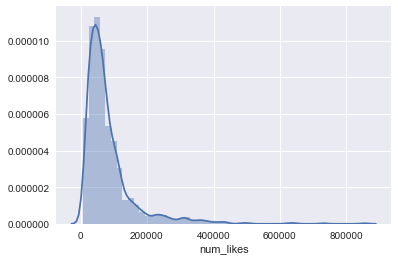

In [51]:
#histogram
sns.distplot(dataset['num_likes']);

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(dataset['num_likes'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataset['num_likes'],plot = plt)

In [52]:
#skewness and kurtosis
print("Skewness: %f" % dataset['num_likes'].skew())
print("Kurtosis: %f" % dataset['num_likes'].kurt())

Skewness: 3.462984
Kurtosis: 18.568105


In [54]:
#applying log transformation
dataset['num_likes'] = np.log(dataset['num_likes']+1)
dataset['num_reactions'] = np.log(dataset['num_reactions']+1)
dataset['num_comments'] = np.log(dataset['num_comments']+1)
dataset['num_shares'] = np.log(dataset['num_shares']+1)

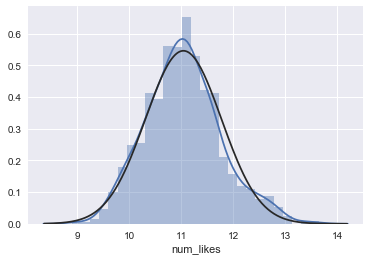

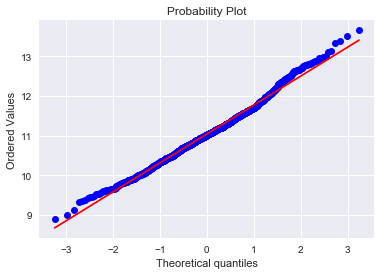

In [55]:
#transformed histogram and normal probability plot
sns.distplot(dataset['num_likes'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataset['num_likes'],plot = plt)

In [23]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [24]:
lm.score(X,y) #R2

0.59930579064963974

In [25]:
lm.coef_

array([[  9.80832481e-01,   5.77068076e-02,   2.30426796e-01,
         -6.56175324e-01,   7.21558330e-05,  -2.11398411e-02,
         -8.84911797e-03,  -1.96189009e-01]])

In [26]:
lm.intercept_

array([-2.39615386])

In [28]:
## X usually means our input variables (or independent variables)

X = dataset[["num_reactions","num_comments","status_type","election_status","status_length","freq","score","status_sentiment"]]
#y = dataset[["num_likes"]]

## Y usually means our output/dependent variable
y = dataset[["num_shares"]] ##Data before and after log transformation



X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_shares   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     218.7
Date:                Thu, 14 Dec 2017   Prob (F-statistic):          3.22e-226
Time:                        00:29:30   Log-Likelihood:                -1390.9
No. Observations:                1179   AIC:                             2800.
Df Residuals:                    1170   BIC:                             2845.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3962      0.375     -6.385      0.000      -3.132      -1.660
num_reactions        0.9808      0.042     23.514      0.000       0.899       1.063
num_comments         0.0577      0.031      1.862      0.063      -0.003       0.118
status_type          0.2304      0.025      9.318      0.000       0.182       0.279
election_status     -0.6562      0.051    -12.864      0.000      -0.756      -0.556
status_length     7.216e-05   5.24e-05      1.377      0.169   -3.06e-05       0.000
freq                -0.0211      0.008     -2.796      0.005      -0.036      -0.006
score               -0.0088      0.013     -0.665      0.506      -0.035       0.017
status_sentiment    -0.1962      0.041     -4.729      0.000      -0.278      -0.115
==============================================================================
Omnibus:                     1044.136   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48619.718
Skew:                          -3.888   Prob(JB):                         0.00
Kurtosis:                      33.483   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
## Without a constant

import statsmodels.api as sm

dataset["freq"] = dataset["freq"]-1 #other status posts

X = dataset[["num_reactions","num_comments","status_type","election_status","status_length","freq","score","status_sentiment"]]

y = dataset[["num_shares"]] ##Data before and after log transformation

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_shares   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.777e+04
Date:                Thu, 14 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:32:44   Log-Likelihood:                -1411.6
No. Observations:                1179   AIC:                             2839.
Df Residuals:                    1171   BIC:                             2880.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
num_reactions        0.7679      0.026     29.489      0.000       0.717       0.819
num_comments         0.0734      0.031      2.337      0.020       0.012       0.135
status_type          0.2055      0.025      8.271      0.000       0.157       0.254
election_status     -0.7492      0.050    -15.050      0.000      -0.847      -0.652
status_length     3.732e-05    5.3e-05      0.704      0.482   -6.67e-05       0.000
freq                -0.0294      0.008     -3.883      0.000      -0.044      -0.015
score               -0.0011      0.013     -0.082      0.934      -0.028       0.025
status_sentiment    -0.2146      0.042     -5.097      0.000      -0.297      -0.132
==============================================================================
Omnibus:                      949.909   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35461.780
Skew:                          -3.417   Prob(JB):                         0.00
Kurtosis:                      28.984   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
## X usually means our input variables (or independent variables)

X = dataset[["num_comments","num_shares","status_type","election_status","status_length","freq","score","status_sentiment"]]

## Y usually means our output/dependent variable
y = dataset[["num_reactions"]] ##Data before and after log transformation

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_reactions   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     246.6
Date:                Thu, 14 Dec 2017   Prob (F-statistic):          7.77e-245
Time:                        00:34:09   Log-Likelihood:                -743.71
No. Observations:                1179   AIC:                             1505.
Df Residuals:                    1170   BIC:                             1551.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5971      0.147     38.147      0.000       5.309       5.885
num_comments         0.3071      0.016     19.797      0.000       0.277       0.338
num_shares           0.3272      0.014     23.514      0.000       0.300       0.354
status_type         -0.1322      0.014     -9.248      0.000      -0.160      -0.104
election_status      0.1648      0.031      5.298      0.000       0.104       0.226
status_length    -7.829e-05   3.02e-05     -2.593      0.010      -0.000    -1.9e-05
freq                 0.0013      0.004      0.301      0.764      -0.007       0.010
score                0.0162      0.008      2.110      0.035       0.001       0.031
status_sentiment     0.1157      0.024      4.832      0.000       0.069       0.163
==============================================================================
Omnibus:                      378.496   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1988.135
Skew:                           1.393   Prob(JB):                         0.00
Kurtosis:                       8.719   Cond. No.                     7.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
## Without a constant

import statsmodels.api as sm

X = dataset[["num_comments","num_shares","status_type","election_status","status_length","freq","score","status_sentiment"]]

y = dataset[["num_reactions"]] ##Data before and after log transformation

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_reactions   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.894e+04
Date:                Thu, 14 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:34:43   Log-Likelihood:                -1228.6
No. Observations:                1179   AIC:                             2473.
Df Residuals:                    1171   BIC:                             2514.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
num_comments         0.6262      0.020     31.621      0.000       0.587       0.665
num_shares           0.5578      0.019     29.423      0.000       0.521       0.595
status_type         -0.1271      0.022     -5.899      0.000      -0.169      -0.085
election_status      0.7276      0.041     17.554      0.000       0.646       0.809
status_length     1.535e-05   4.54e-05      0.338      0.735   -7.37e-05       0.000
freq                 0.0315      0.007      4.853      0.000       0.019       0.044
score               -0.0052      0.012     -0.453      0.651      -0.028       0.017
status_sentiment     0.3234      0.035      9.186      0.000       0.254       0.392
==============================================================================
Omnibus:                      241.427   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1829.894
Skew:                           0.729   Prob(JB):                         0.00
Kurtosis:                       8.927   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
## X usually means our input variables (or independent variables)

X = dataset[["num_reactions","num_shares","status_type","election_status","status_length","freq","score","status_sentiment"]]

## Y usually means our output/dependent variable
y = dataset[["num_comments"]] ##Data before and after log transformation

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_comments   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     138.3
Date:                Thu, 14 Dec 2017   Prob (F-statistic):          2.88e-163
Time:                        00:35:15   Log-Likelihood:                -1320.7
No. Observations:                1179   AIC:                             2659.
Df Residuals:                    1170   BIC:                             2705.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8503      0.356     -2.390      0.017      -1.548      -0.152
num_reactions        0.8171      0.041     19.797      0.000       0.736       0.898
num_shares           0.0512      0.028      1.862      0.063      -0.003       0.105
status_type          0.1644      0.024      6.947      0.000       0.118       0.211
election_status     -0.1783      0.051     -3.490      0.001      -0.279      -0.078
status_length     8.451e-05   4.93e-05      1.713      0.087   -1.23e-05       0.000
freq                -0.0148      0.007     -2.071      0.039      -0.029      -0.001
score               -0.0346      0.012     -2.771      0.006      -0.059      -0.010
status_sentiment    -0.0552      0.039     -1.399      0.162      -0.133       0.022
==============================================================================
Omnibus:                      292.050   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.833
Skew:                           1.367   Prob(JB):                    4.71e-142
Kurtosis:                       5.402   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
## Without a constant

import statsmodels.api as sm

dataset["freq"] = dataset["freq"]-1 #other status posts

X = dataset[["num_reactions","num_shares","status_type","election_status","status_length","freq","score","status_sentiment"]]

y = dataset[["num_comments"]] ##Data before and after log transformation

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_comments   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.084e+04
Date:                Thu, 14 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:35:48   Log-Likelihood:                -1323.7
No. Observations:                1179   AIC:                             2663.
Df Residuals:                    1171   BIC:                             2704.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
num_reactions        0.7338      0.023     31.649      0.000       0.688       0.779
num_shares           0.0644      0.027      2.383      0.017       0.011       0.117
status_type          0.1532      0.023      6.586      0.000       0.108       0.199
election_status     -0.2031      0.050     -4.050      0.000      -0.302      -0.105
status_length     7.165e-05   4.92e-05      1.457      0.145   -2.48e-05       0.000
freq                -0.0165      0.007     -2.312      0.021      -0.030      -0.002
score               -0.0319      0.012     -2.558      0.011      -0.056      -0.007
status_sentiment    -0.0596      0.039     -1.510      0.131      -0.137       0.018
==============================================================================
Omnibus:                      314.838   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              755.420
Skew:                           1.435   Prob(JB):                    9.18e-165
Kurtosis:                       5.672   Cond. No.                     1.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [49]:
dataset = pd.read_csv("dataset.csv") #load the dataset

In [50]:
dataset['election_status'] = dataset['election_status'].astype('category')
dataset['election_status'] = dataset['election_status'].cat.reorder_categories(['Before', 'After'], ordered=True)
dataset['election_status'] = dataset['election_status'].cat.codes

In [51]:
dataset['status_sentiment'] = dataset['status_sentiment'].astype('category')
dataset['status_sentiment'] = dataset['status_sentiment'].cat.reorder_categories(['negative', 'neutral', 'positive'], ordered=True)
dataset['status_sentiment'] = dataset['status_sentiment'].cat.codes

dataset['status_time'] = dataset['status_time'].astype('category')
dataset['status_time'] = dataset['status_time'].cat.codes

dataset['status_type'] = dataset['status_type'].astype('category')
dataset['status_type'] = dataset['status_type'].cat.codes

dataset['status_day'] = dataset['status_day'].astype('category')
dataset['status_day'] = dataset['status_day'].cat.codes
#print(dataset['status_day'])

In [52]:
import random
random.seed('group6')

train, test = train_test_split(dataset, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(825, 29)
(354, 29)


In [53]:
train_X = train[['num_reactions','num_comments','num_shares','status_length','freq','score','status_type','status_sentiment']]# taking the training data features
train_y=train.election_status # output of our training data
test_X= test[['num_reactions','num_comments','num_shares','status_length','freq','score','status_type','status_sentiment']] # taking test data features
test_y =test.election_status   #output value of test data

In [45]:
train_X.head(3)

,num_reactions,num_comments,num_shares,status_length,freq,score,status_type,status_sentiment
1017,33843,3596,2375,233,1,0,1,1
1039,39277,3571,8238,561,3,-1,3,0
1146,215031,21764,468757,268,2,-3,3,0


In [46]:
test_X.head(3)

,num_reactions,num_comments,num_shares,status_length,freq,score,status_type,status_sentiment
105,200829,6000,12631,13,6,1,0,2
994,21280,2309,2743,296,2,-1,3,0
359,42831,5015,2955,17,4,1,1,2


In [40]:
train_y.head()  ##output of the training data

178     1
96      1
635     1
1117    0
585     1
Name: election_status, dtype: int8

In [54]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.771186440678


In [55]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.751412429379


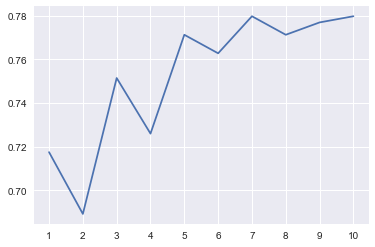

In [59]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours

plt.close()
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

In [60]:
model=KNeighborsClassifier(n_neighbors=7) #this examines 7 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.779661016949
